In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [ ]:
# Set random seed for reproducibility
np.random.seed(0)

# Generate synthetic medical dataset
n_samples = 1000
age = np.random.randint(20, 80, size=n_samples)
bmi = np.random.uniform(18.5, 35, size=n_samples)
cholesterol = np.random.randint(150, 300, size=n_samples)
blood_pressure = np.random.randint(80, 180, size=n_samples)
glucose = np.random.randint(70, 200, size=n_samples)

# Generate synthetic target variable (medical cost)
noise = np.random.randn(n_samples) * 1000
medical_cost = 10000 + (age * 300) + (bmi * 500) + (cholesterol * 10) + (blood_pressure * 5) + (glucose * 8) + noise

# Reshape the features to match the expected input shape of the linear regression model
X = np.column_stack((age, bmi, cholesterol, blood_pressure, glucose))


# **Fit linear regression model**

In [ ]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, medical_cost)
# Generate predictions on the entire dataset
medical_cost_pred = model.predict(X)


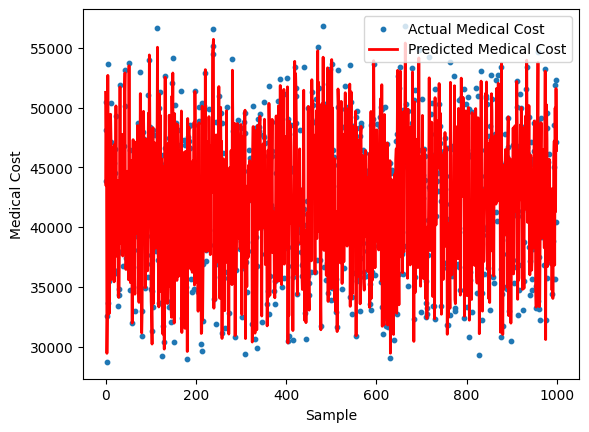

In [ ]:
# Plot the actual medical cost and the predicted medical cost
plt.scatter(range(n_samples), medical_cost, s=10, label='Actual Medical Cost')
plt.plot(range(n_samples), medical_cost_pred, color='red', linewidth=2, label='Predicted Medical Cost')
plt.xlabel('Sample')
plt.ylabel('Medical Cost')
plt.legend()
plt.show()


# ***Example 2***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns


 # Set random seed for reproducibility
np.random.seed(0)

# Generate synthetic medical dataset
n_samples = 1000
age = np.random.randint(20, 80, size=n_samples)
bmi = np.random.uniform(18.5, 35, size=n_samples)
cholesterol = np.random.randint(150, 300, size=n_samples)
blood_pressure = np.random.randint(80, 180, size=n_samples)
glucose = np.random.randint(70, 200, size=n_samples)

# Generate synthetic target variable (medical cost)
noise = np.random.randn(n_samples) * 1000
medical_cost = 10000 + (age * 300) + (bmi * 500) + (cholesterol * 10) + (blood_pressure * 5) + (glucose * 8) + noise

# Reshape the features to match the expected input shape of the linear regression model
X = np.column_stack((age, bmi, cholesterol, blood_pressure, glucose))
y = medical_cost


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Generate predictions on the test set
y_pred = model.predict(X_test)


Model evaluation

In [ ]:
# Calculate mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 1070875.845559964
R-squared Score: 0.9690186181092231


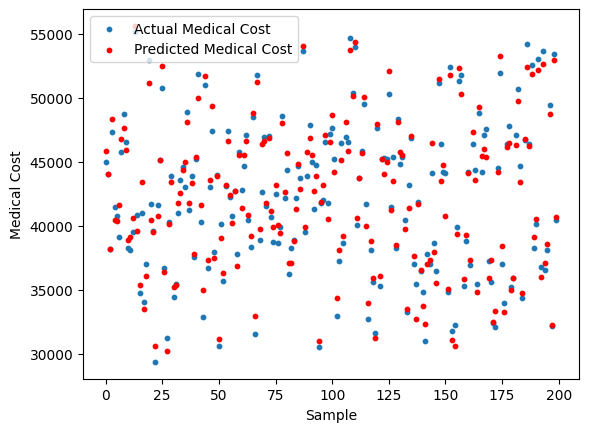

In [ ]:
# Plot the actual medical cost and the predicted medical cost
plt.scatter(range(len(y_test)), y_test, s=10, label='Actual Medical Cost')
plt.scatter(range(len(y_test)), y_pred, color='red', s=10, label='Predicted Medical Cost')
plt.xlabel('Sample')
plt.ylabel('Medical Cost')
plt.legend()
plt.show()


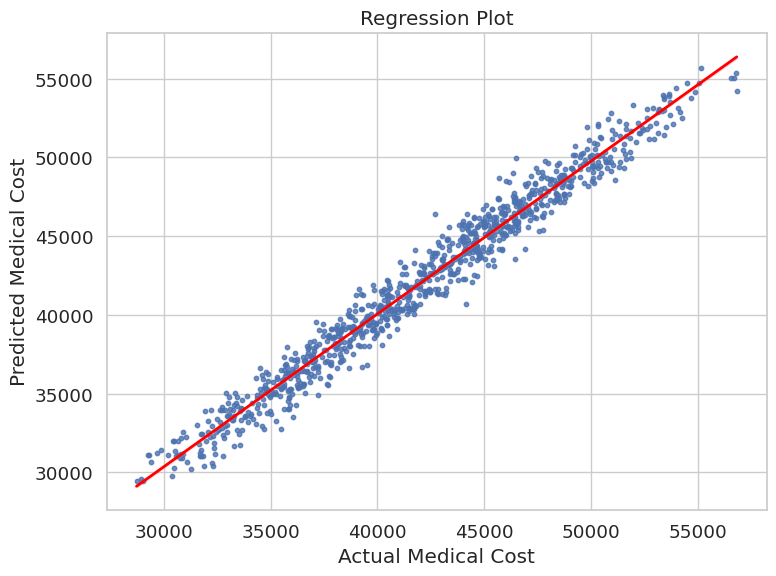

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic medical dataset
np.random.seed(0)
n_samples = 1000
age = np.random.randint(20, 80, size=n_samples)
bmi = np.random.uniform(18.5, 35, size=n_samples)
cholesterol = np.random.randint(150, 300, size=n_samples)
blood_pressure = np.random.randint(80, 180, size=n_samples)
glucose = np.random.randint(70, 200, size=n_samples)
noise = np.random.randn(n_samples) * 1000

medical_cost = 10000 + (age * 300) + (bmi * 500) + (cholesterol * 10) + (blood_pressure * 5) + (glucose * 8) + noise
X = np.column_stack((age, bmi, cholesterol, blood_pressure, glucose))
y = medical_cost

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Generate predictions
y_pred = model.predict(X)

# Create a scatter plot with regression line using seaborn
sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x=y, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red', 'linewidth': 2})
plt.xlabel('Actual Medical Cost')
plt.ylabel('Predicted Medical Cost')
plt.title('Regression Plot')
plt.tight_layout()
plt.show()


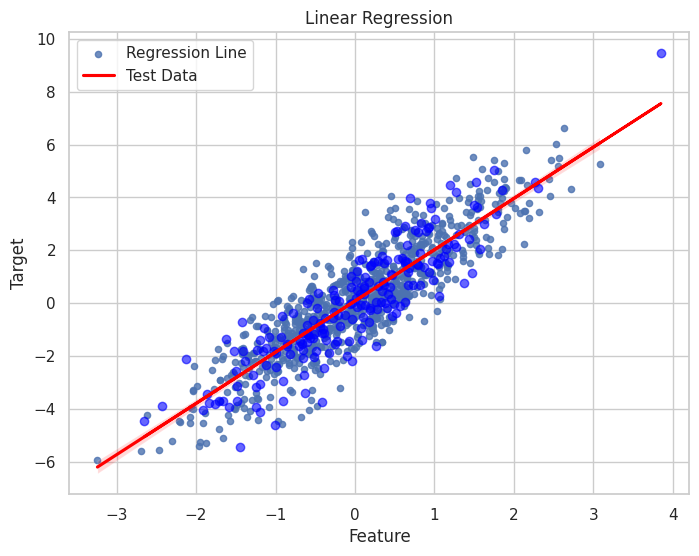

R-squared: 0.7949209372024619


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Generate synthetic medical dataset
np.random.seed(42)
num_samples = 1000
x = np.random.normal(0, 1, num_samples)
y = 2 * x + np.random.normal(0, 1, num_samples)

# Create a DataFrame from the data
data = pd.DataFrame({'Feature': x, 'Target': y})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Feature'], data['Target'], test_size=0.2, random_state=42)

# Train the linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train.values.reshape(-1, 1), y_train)

# Predict on the test set
y_pred = regression_model.predict(X_test)

# Plot the regression line and data points
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.regplot(x=X_train, y=y_train, scatter_kws={"s": 20}, line_kws={"color": "red"})
plt.scatter(X_test, y_test, color='blue', alpha=0.6)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend(['Regression Line', 'Test Data'])
plt.show()

# Calculate the coefficient of determination (R-squared) on the test set
r2_score = regression_model.score(X_test, y_test)
print(f'R-squared: {r2_score}')


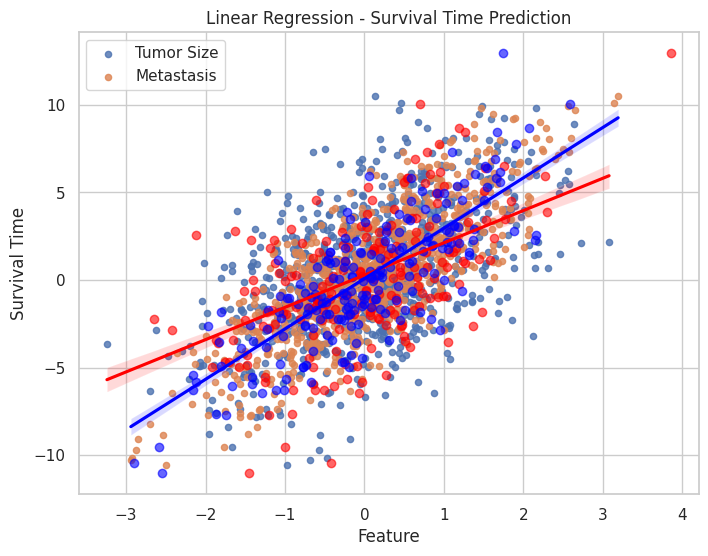

R-squared: 0.9288097670965954
     Tumor Size  Metastasis  Survival Time
0      0.496714    1.399355       4.516316
1     -0.138264    0.924634       2.352854
2      0.647689    0.059630       0.681848
3      1.523030   -0.646937       0.797288
4     -0.234153    0.698223      -0.267251
..          ...         ...            ...
995   -0.281100    1.070150       2.725731
996    1.797687   -0.026521       3.773562
997    0.640843   -0.881875      -2.605699
998   -0.571179   -0.163067      -1.297382
999    0.572583   -0.744903      -1.244801

[1000 rows x 3 columns]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Generate synthetic medical dataset related to neuroscience with cancer-related feature names
np.random.seed(42)
num_samples = 1000
x1 = np.random.normal(0, 1, num_samples)
x2 = np.random.normal(0, 1, num_samples)
y = 2 * x1 + 3 * x2 + np.random.normal(0, 1, num_samples)

# Create a DataFrame from the data
data = pd.DataFrame({'Tumor Size': x1, 'Metastasis': x2, 'Survival Time': y})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['Tumor Size', 'Metastasis']], data['Survival Time'], test_size=0.2, random_state=42)

# Train the linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predict on the test set
y_pred = regression_model.predict(X_test)

# Plot the regression line and data points
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.regplot(x=X_train['Tumor Size'], y=y_train, scatter_kws={"s": 20}, line_kws={"color": "red"}, label='Tumor Size')
sns.regplot(x=X_train['Metastasis'], y=y_train, scatter_kws={"s": 20}, line_kws={"color": "blue"}, label='Metastasis')
plt.scatter(X_test['Tumor Size'], y_test, color='red', alpha=0.6)
plt.scatter(X_test['Metastasis'], y_test, color='blue', alpha=0.6)
plt.xlabel('Feature')
plt.ylabel('Survival Time')
plt.title('Linear Regression - Survival Time Prediction')
plt.legend()
plt.show()

# Calculate the coefficient of determination (R-squared) on the test set
r2_score = regression_model.score(X_test, y_test)
print(f'R-squared: {r2_score}')
print (data)


# **Logistic Regression **

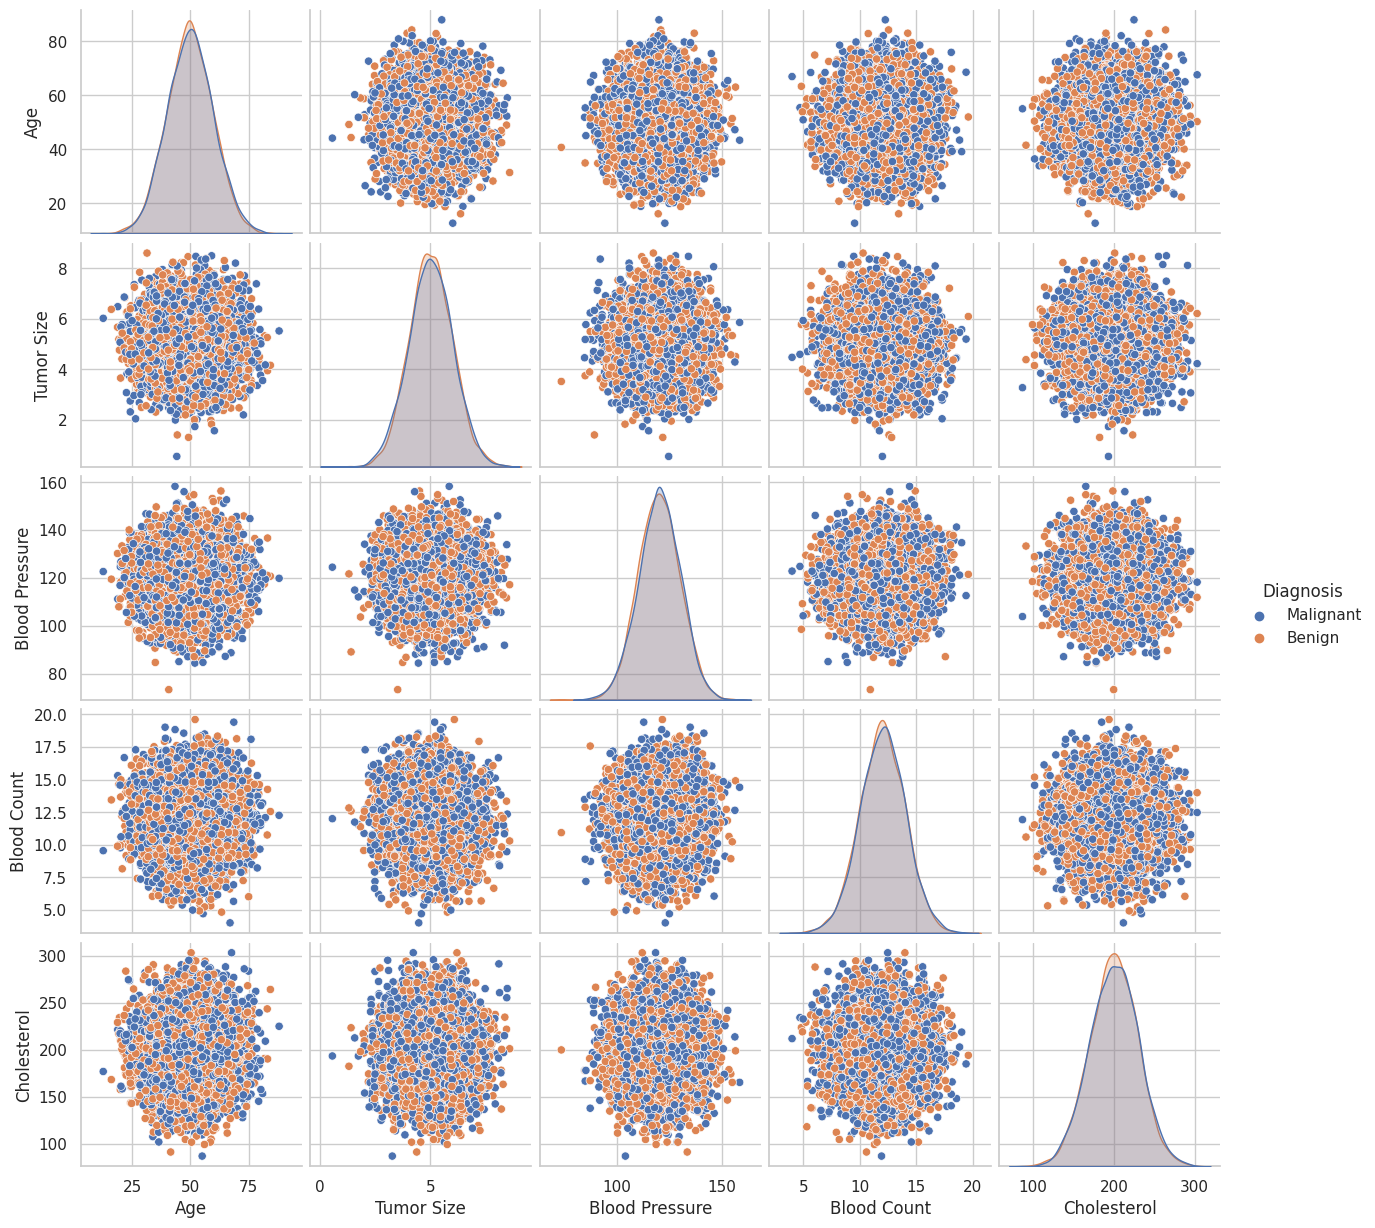

Confusion Matrix:
[[569 440]
 [540 451]]


<Figure size 300x300 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Generate a large synthetic medical dataset
np.random.seed(0)
n_samples = 10000

# Features with specific medical names
age = np.random.normal(50, 10, n_samples)
tumor_size = np.random.normal(5, 1, n_samples)
blood_pressure = np.random.normal(120, 10, n_samples)
blood_count = np.random.normal(12, 2, n_samples)
cholesterol = np.random.normal(200, 30, n_samples)

# Target variable
diagnosis = np.random.choice(['Malignant', 'Benign'], size=n_samples)

# Create a DataFrame
df = pd.DataFrame({
    'Age': age,
    'Tumor Size': tumor_size,
    'Blood Pressure': blood_pressure,
    'Blood Count': blood_count,
    'Cholesterol': cholesterol,
    'Diagnosis': diagnosis
})

# Visualization using Seaborn
sns.pairplot(df, hue='Diagnosis')
plt.show()
plt.figure(figsize=(3, 3))


# Split the data into train and test sets
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


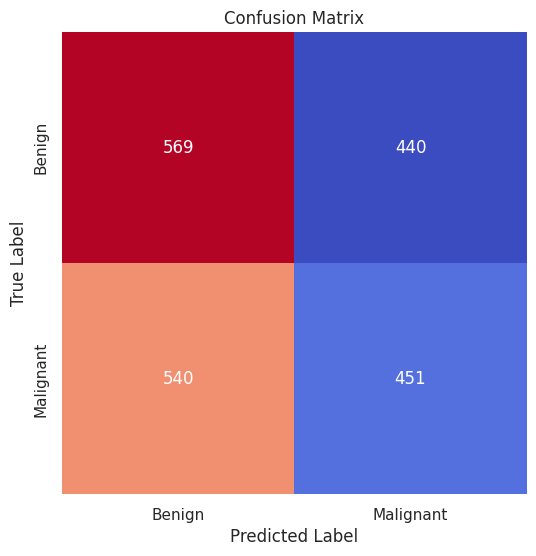

Accuracy: 0.51


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Generate a synthetic medical dataset (same as the previous example)
np.random.seed(0)
n_samples = 10000
age = np.random.normal(50, 10, n_samples)
tumor_size = np.random.normal(5, 1, n_samples)
blood_pressure = np.random.normal(120, 10, n_samples)
blood_count = np.random.normal(12, 2, n_samples)
cholesterol = np.random.normal(200, 30, n_samples)
diagnosis = np.random.choice(['Malignant', 'Benign'], size=n_samples)

df = pd.DataFrame({
    'Age': age,
    'Tumor Size': tumor_size,
    'Blood Pressure': blood_pressure,
    'Blood Count': blood_count,
    'Cholesterol': cholesterol,
    'Diagnosis': diagnosis
})

# Split the data into train and test sets
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix for better visualization
labels = ['Benign', 'Malignant']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



# **Support Vector Machine (SVM)**

Confusion Matrix:
[[730 279]
 [715 276]]


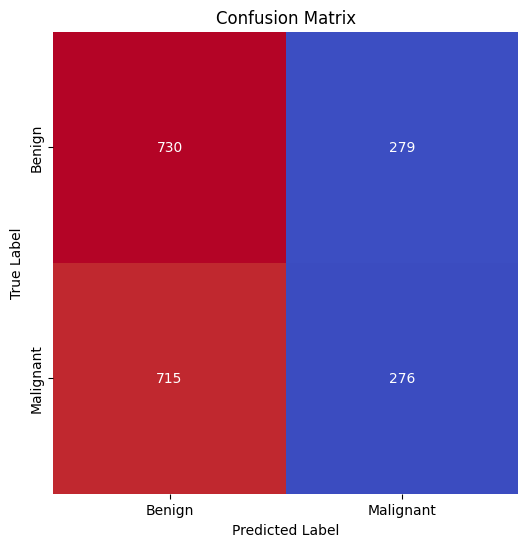

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Generate a large synthetic medical dataset
np.random.seed(0)
n_samples = 10000

# Features with specific medical names
age = np.random.normal(50, 10, n_samples)
tumor_size = np.random.normal(5, 1, n_samples)
blood_pressure = np.random.normal(120, 10, n_samples)
blood_count = np.random.normal(12, 2, n_samples)
cholesterol = np.random.normal(200, 30, n_samples)

# Target variable
diagnosis = np.random.choice(['Malignant', 'Benign'], size=n_samples)

# Create a DataFrame
df = pd.DataFrame({
    'Age': age,
    'Tumor Size': tumor_size,
    'Blood Pressure': blood_pressure,
    'Blood Count': blood_count,
    'Cholesterol': cholesterol,
    'Diagnosis': diagnosis
})

# Split the data into train and test sets
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the SVM model
model = SVC()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
labels = ['Benign', 'Malignant']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Visualization using Seaborn
# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Confusion Matrix:
[[730 279]
 [715 276]]


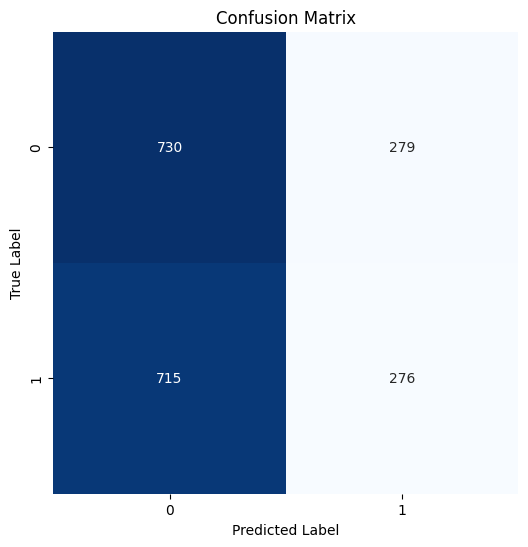

Accuracy: 0.503


AttributeError: ignored

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

# Generate a large synthetic medical dataset
np.random.seed(0)
n_samples = 10000

# Features with specific medical names
age = np.random.normal(50, 10, n_samples)
tumor_size = np.random.normal(5, 1, n_samples)
blood_pressure = np.random.normal(120, 10, n_samples)
blood_count = np.random.normal(12, 2, n_samples)
cholesterol = np.random.normal(200, 30, n_samples)

# Target variable
diagnosis = np.random.choice(['Malignant', 'Benign'], size=n_samples)

# Create a DataFrame
df = pd.DataFrame({
    'Age': age,
    'Tumor Size': tumor_size,
    'Blood Pressure': blood_pressure,
    'Blood Count': blood_count,
    'Cholesterol': cholesterol,
    'Diagnosis': diagnosis
})

# Split the data into train and test sets
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the SVM model
model = SVC(probability=True)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualization using Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate AUC
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)


AUC: 0.49968499873999506


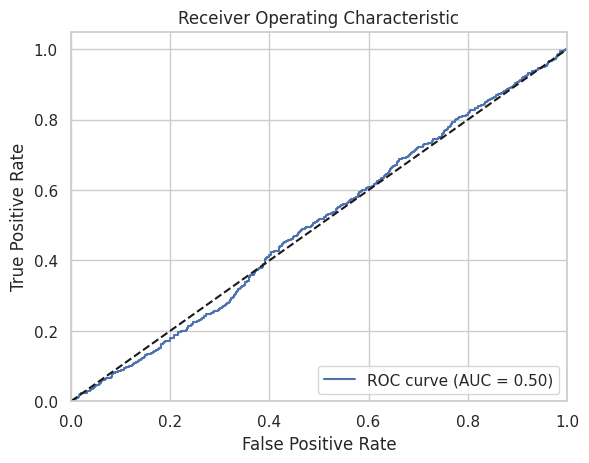

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Generate a large synthetic medical dataset
np.random.seed(42)
n_samples = 10000

# Features with specific medical names
age = np.random.normal(50, 10, n_samples)
tumor_size = np.random.normal(5, 1, n_samples)
blood_pressure = np.random.normal(120, 10, n_samples)
blood_count = np.random.normal(12, 2, n_samples)
cholesterol = np.random.normal(200, 30, n_samples)

# Target variable
diagnosis = np.random.choice(['Malignant', 'Benign'], size=n_samples)

# Create a DataFrame
df = pd.DataFrame({
    'Age': age,
    'Tumor Size': tumor_size,
    'Blood Pressure': blood_pressure,
    'Blood Count': blood_count,
    'Cholesterol': cholesterol,
    'Diagnosis': diagnosis
})

# Split the data into train and test sets
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Label encoding of the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the SVM model
model = SVC(probability=True)
model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate the AUC
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()



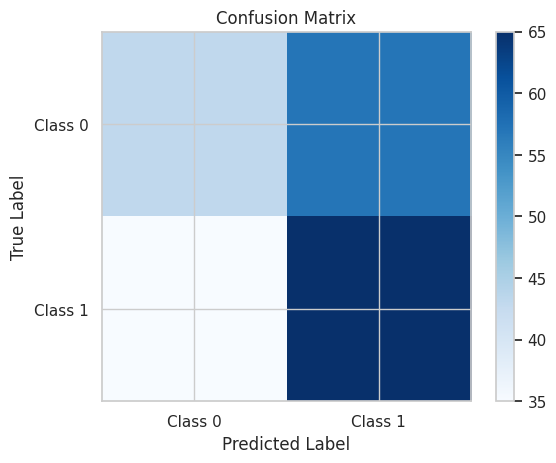

Accuracy: 54.00%


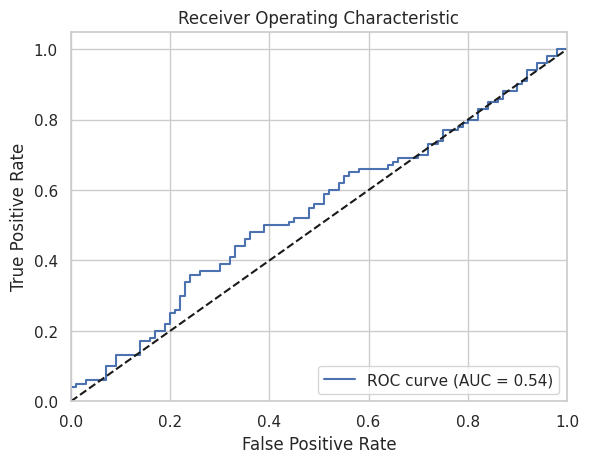

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Generate synthetic medical dataset
np.random.seed(42)
n_samples = 1000
n_features = 10

X = np.random.rand(n_samples, n_features)
y = np.random.randint(0, 2, n_samples)

# Convert the data to a DataFrame
feature_names = ['Feature' + str(i+1) for i in range(n_features)]
data = pd.DataFrame(X, columns=feature_names)
data['target'] = y

# Separate features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)

# Model validation
y_pred = svm.predict(X_test)

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Class 0', 'Class 1'])
plt.yticks(tick_marks, ['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Accuracy calculation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Plotting the AUC curve
y_scores = svm.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# **Clustring **

In [6]:
from sklearn.datasets import make_blobs

# Generate synthetic medical data
X, _ = make_blobs(n_samples=1000, centers=4, cluster_std=1.5, random_state=42)
print (X)

[[-8.41339595  6.93516545]
 [-5.76648413 -6.43117072]
 [-6.04213682 -6.76610151]
 ...
 [ 3.2157805   5.92174278]
 [-7.79389549 -7.16056655]
 [-9.6815798   7.0096901 ]]


In [7]:
from sklearn.cluster import KMeans

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


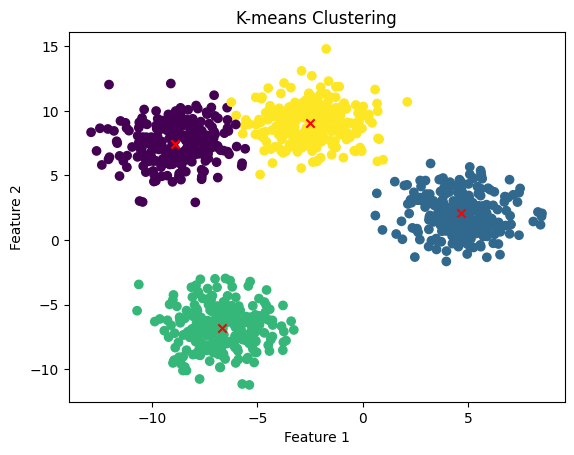

In [8]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.6876600436588094


# **DBSCAN Clustring **

In [9]:
from sklearn.datasets import make_moons

# Generate synthetic medical data
X, _ = make_moons(n_samples=1000, noise=0.1, random_state=42)


In [20]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.09, min_samples=2 )
labels = dbscan.fit_predict(X)


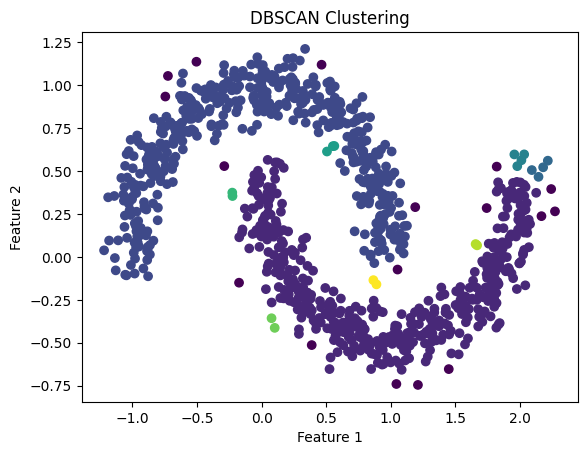

In [21]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()


In [ ]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')


Number of clusters: 9
Number of noise points: 17
